In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from spacy.lang.en.stop_words import STOP_WORDS

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [83]:
#found code solution from stackoverflow: https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Datasets/Capstone/

df = pd.read_csv('all_reviews_for_vectorizing.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Datasets/Capstone


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [84]:
#data cleanup
df.dropna(inplace=True)

#sample down data
df2 = df.sample(frac=0.02)

In [85]:
df2.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,language,word_count,overall_score_bin
186506,6545310,5.122223e+07,2015-10-18,4602359.0,Joshua,whilst i never met clay the apartment was a fa...,4.86,4.79,4.63,4.88,4.89,4.76,4.79,en,41.0,4.5
471802,29814549,4.545447e+08,2019-05-18,20976871.0,Violeta,william was really helpful he always answered ...,4.80,4.90,4.79,4.92,4.94,4.80,4.78,en,185.0,4.5
564886,45413193,4.883849e+17,2021-11-04,70496113.0,Joy,mia is great this is a very good spot for solo...,4.98,4.98,4.98,5.00,4.98,4.83,4.97,en,41.0,4.5


In [107]:
#stopwords
custom_stop = ['airbnb', 'air bnb', 't', 's', 'air', 'bnb', 'new', 'york', 'new york', 'stay', 'place', 'apartment', 'll', 've']
stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop).union(STOP_WORDS)

In [87]:
#remove stop words from dataframe

df2['comments'] = df2['comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [88]:
#create key words pulled from vectorized EDA -- added the antonym for the phrases and common words found in EDA
location = ['walking distance', 'subway', 'close subway', 'great location', 'minute walk', 'times square',
            'central park', 'blocks away', 'location close', 'metro station', 'neighborhood', 'nearby', 'close', 'far']

host = ['great host', 'quick respond', 'communication', 'host', 'responsive', 'accomodating', 'welcoming', 'welcoming',
        'no response', 'did not respond', 'no communication']

hygeine = ['place clean', 'apartment clean', 'clean comfortable', 'room clean', 'super clean', 'clean',
           'dirty', 'gross']

comfort = ['bed comfortable', 'comfortable', 'like home', 'nice place', 'place nice', 'spacious', 'safe',
           'unsafe', 'uncomfortable', 'small', 'cramped', 'tiny', 'unsafe']

cost = ['great value', 'value', 'expensive']

In [89]:
#create targets
df2['location'] = df2['comments'].str.contains('|'.join(location), 1, 0)
df2['host'] = df2['comments'].str.contains('|'.join(host), 1, 0)
df2['hygeine'] = df2['comments'].str.contains('|'.join(hygeine), 1, 0)
df2['comfort'] = df2['comments'].str.contains('|'.join(comfort), 1, 0)
df2['cost'] = df2['comments'].str.contains('|'.join(cost), 1, 0)

In [90]:
df2.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,language,word_count,overall_score_bin,location,host,hygeine,comfort,cost
186506,6545310,5.122223e+07,2015-10-18,4602359.0,Joshua,whilst met clay fantastic rest head night amen...,4.86,4.79,4.63,4.88,4.89,4.76,4.79,en,41.0,4.5,False,False,True,True,False
471802,29814549,4.545447e+08,2019-05-18,20976871.0,Violeta,william helpful answered questions e timely ma...,4.80,4.90,4.79,4.92,4.94,4.80,4.78,en,185.0,4.5,True,False,True,False,False
564886,45413193,4.883849e+17,2021-11-04,70496113.0,Joy,mia great good spot solo travelers like home b...,4.98,4.98,4.98,5.00,4.98,4.83,4.97,en,41.0,4.5,True,False,False,True,False


In [91]:
#convert targets to integers
df2['location'] = df2['location'].astype(int)
df2['host'] = df2['host'].astype(int)
df2['hygeine'] = df2['hygeine'].astype(int)
df2['comfort'] = df2['comfort'].astype(int)
df2['cost'] = df2['cost'].astype(int)

df2.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,language,word_count,overall_score_bin,location,host,hygeine,comfort,cost
186506,6545310,5.122223e+07,2015-10-18,4602359.0,Joshua,whilst met clay fantastic rest head night amen...,4.86,4.79,4.63,4.88,4.89,4.76,4.79,en,41.0,4.5,0,0,1,1,0
471802,29814549,4.545447e+08,2019-05-18,20976871.0,Violeta,william helpful answered questions e timely ma...,4.80,4.90,4.79,4.92,4.94,4.80,4.78,en,185.0,4.5,1,0,1,0,0
564886,45413193,4.883849e+17,2021-11-04,70496113.0,Joy,mia great good spot solo travelers like home b...,4.98,4.98,4.98,5.00,4.98,4.83,4.97,en,41.0,4.5,1,0,0,1,0


In [92]:
#convert dataframe to data set for modeling
df = df2[['comments', 'location', 'host', 'hygeine', 'comfort','cost']]
df.head(3)

,comments,location,host,hygeine,comfort,cost
186506,whilst met clay fantastic rest head night amen...,0,0,1,1,0
471802,william helpful answered questions e timely ma...,1,0,1,0,0
564886,mia great good spot solo travelers like home b...,1,0,0,1,0


In [93]:
#export prepared dataset for future modeling
df.to_csv('review_data_for_modeling.csv', index=False)

# Modeling

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

#setting random seed for all models
np.random.seed(42)


### Establishing baselines
- Relatively balanced classes for location and host
- Imbalanced classes for hygeine, comfort and cost

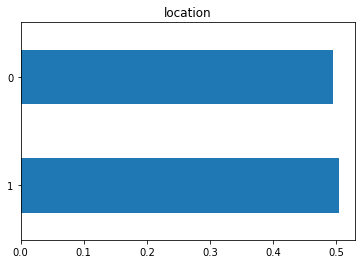

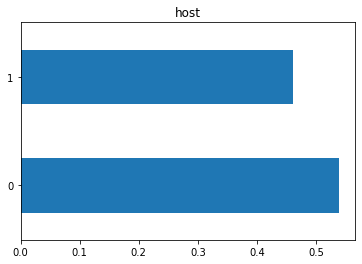

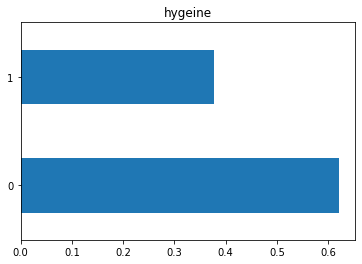

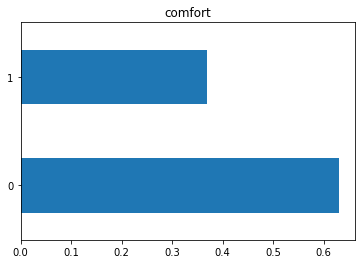

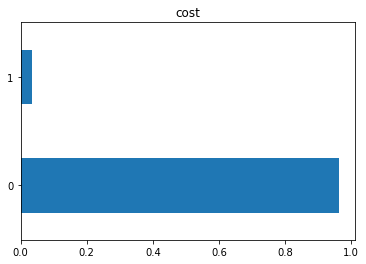

In [95]:
features = ['location', 'host', 'hygeine', 'comfort', 'cost']

for x in features:
  df[x].value_counts(normalize=True).plot.barh(title=x)
  plt.show()

# Approach 1: Building multiple binary classification models to detect each category within comments. Combine together to form ensemble models to detect within comments

In [110]:
#function to prepare data for modeling

def model_data (target, model_type):
  #prepare dataframes
  X = df['comments']
  y = df[target]

  cvec = CountVectorizer(stop_words=stop_words)
  
  #train test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

  #vectorize
  X_train_vectorized = cvec.fit_transform(X_train)
  X_test_vectorized = cvec.transform(X_test)
  X_traindf = pd.DataFrame(X_train_vectorized.todense(), columns=cvec.get_feature_names_out())
  X_testdf = pd.DataFrame(X_test_vectorized.todense(), columns=cvec.get_feature_names_out())

  #model fitting
  model = model_type
  model.fit(X_traindf, y_train)

  #predictions
  preds = model.predict(X_testdf)

  #accuracy scores
  print('----------')
  print(f'{target} accuracy: {model.score(X_traindf, y_train)}, {model.score(X_testdf, y_test)}')
  print(f'{target} recall: {recall_score(y_test, preds)}')
  print(f'{target} precision: {precision_score(y_test, preds)}')

  return 

In [111]:
#model results for Logistic Regression
for x in features:
  model_data(x, LogisticRegression())

----------
location accuracy: 0.9881584772023019, 0.9339309428950863
location recall: 0.9119000657462196
location precision: 0.9552341597796143
----------
host accuracy: 0.9967906153165117, 0.9847277556440903
host recall: 0.969718817591925
host precision: 0.9970348406226834
----------
hygeine accuracy: 0.9982293050022134, 0.9897078353253652
hygeine recall: 0.9736611062335382
hygeine precision: 0.9990990990990991
----------
comfort accuracy: 0.9967906153165117, 0.9747675962815405
comfort recall: 0.9450945094509451
comfort precision: 0.9859154929577465
----------
cost accuracy: 0.9994466578131916, 0.9930278884462151
cost recall: 0.8037383177570093
cost precision: 1.0


# Modeling Results
- Based on the words discovered during EDA, the logistic model performs fairly well on terms of accuracy, precision and recall. Each category performs above their baseline majority categories.
- The only exception is cost, which scored less well on recall and showed a precision rate of 1.0, which means additional data related specifically to cost will need to be brough into the dataset to better train the model.
- Now that models have been created to detect subcategory themes from reviews, the next stepp will be ensembling these models and applying them to test data.